Import the needed libraries

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
 # module to convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 112 kB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 79 kB 2.3 MB/s eta 0:00:011
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=bf5bd74eeb589519ba2696444d5a813ae3f31505348b2569f21aa410836c4c4a
  Stored in directory: /home/jovyan/.cache/pip/wheels/30/23/fa/d780f592f28111fcab8071089c09eaa84602d62478a06ed623
Successfully built folium
Folium installed
Libraries imported.


In [2]:
CLIENT_ID = 'CKDWP5VJMC3VBZKCUEV4NUQHKRIQ4WL1HK0CHNGCGGY12SXL' # your Foursquare ID
CLIENT_SECRET = 'Q2W2QUMC5FQHZYOICKFXL0ZE1IJHFVRJ4YWAL3FAA4YNXIBN' # your Foursquare Secret
ACCESS_TOKEN = 'LNRTSWVI122MIVO3PRDURET2WMHQDNOTOJBCZFI1AOOI4TKB' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CKDWP5VJMC3VBZKCUEV4NUQHKRIQ4WL1HK0CHNGCGGY12SXL
CLIENT_SECRET:Q2W2QUMC5FQHZYOICKFXL0ZE1IJHFVRJ4YWAL3FAA4YNXIBN


In order to define an instance of the geocoder, we need to define a user_agent. 
We will name our agent foursquare_agent, as shown below.

In [3]:
address1 = 'C. Jordi Girona, 3208034 Barcelona Cataluña España'
address2 = 'Gran Via de les Corts Catalanes, 585, 08007 Barcelona Cataluña España'

geolocator1 = Nominatim(user_agent="foursquare_agent")
location1 = geolocator1.geocode(address1)
latitude1 = location1.latitude
longitude1 = location1.longitude
print('Location of Polytechnic University of Catalonia:',latitude1, longitude1)

geolocator2 = Nominatim(user_agent="foursquare_agent")
location2 = geolocator2.geocode(address2)
latitude2 = location2.latitude
longitude2 = location2.longitude
print('Location of University of Barcelona:',latitude2, longitude2)



Location of Polytechnic University of Catalonia: 41.3877523 2.1147272
Location of University of Barcelona: 41.3866985 2.163828091253939


A suitable place needs hotels to locate the people attending the congress. Are there hotels near the university?

In [4]:
search_query = 'Hotel'
radius = 1000

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude1, longitude1,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url
results = requests.get(url).json()
hotels1 = results['response']['venues']
dataframe1 = json_normalize(hotels1)

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude2, longitude2,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url
results = requests.get(url).json()
hotels2 = results['response']['venues']
dataframe2 = json_normalize(hotels2)


/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  
/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [5]:
dataframe1.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,location.neighborhood,venuePage.id
0,4bc5a24b0a30d13a94385a9c,AC Hotel Victoria Suites by Marriott,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1625733604,False,"Beltran I Ròzpide, 7-9",41.389324,2.121338,"[{'label': 'display', 'lat': 41.389324, 'lng':...",579,08034,ES,Barcelona,Cataluña,España,"[Beltran I Ròzpide, 7-9, 08034 Barcelona Catal...",NaN,NaN,NaN
1,4adcda4cf964a520b93f21e3,Gran Hotel Princesa Sofía,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1625733604,False,"Plaça de Pius XII, 4",41.386517,2.123076,"[{'label': 'display', 'lat': 41.38651744622853...",710,08028,ES,Barcelona,Cataluña,España,"[Plaça de Pius XII, 4 (Av. Diagonal), 08028 Ba...",Av. Diagonal,NaN,NaN
2,4bcc5f5baeaaeee1a1f23d6d,Hotel Sansi Pedralbes,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1625733604,False,"Av. Pearson, 1-3",41.393435,2.111722,"[{'label': 'display', 'lat': 41.39343506028381...",680,NaN,ES,Barcelona,Cataluña,España,"[Av. Pearson, 1-3, Barcelona Cataluña]",NaN,NaN,NaN
3,5d30def44318c90008b07cba,Hotel Sofia Barcelona - In the Unbound Collect...,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1625733604,False,Plaça De Pius Xii 4,41.385980,2.123314,"[{'label': 'display', 'lat': 41.38598, 'lng': ...",743,08028,ES,Barcelona,Cataluña,España,"[Plaça De Pius Xii 4, 08028 Barcelona Cataluña]",NaN,NaN,NaN
4,4e38aa161fc7e413a51a4788,Fairmont Hotel Rey Juan Carlos I (Hotel Rey Ju...,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1625733604,False,Av Diagonal 661 671,41.381291,2.109191,"[{'label': 'display', 'lat': 41.381291, 'lng':...",855,08028,ES,Barcelona,Cataluña,España,"[Av Diagonal 661 671, 08028 Barcelona Cataluña]",NaN,Les Corts,35398022


In [6]:
dataframe2.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,venuePage.id
0,4adcda4bf964a520673f21e3,Hotel NH Collection Barcelona Gran Hotel Calderón,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1625733604,False,"Rbla. de Catalunya, 26",41.389264,2.166129,"[{'label': 'display', 'lat': 41.38926386465471...",344,08007,ES,Barcelona,Cataluña,España,"[Rbla. de Catalunya, 26, 08007 Barcelona Catal...",NaN,NaN
1,4b39cb3df964a520015f25e3,Hotel Pulitzer,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1625733604,False,"C. Bergara, 8",41.386245,2.168272,"[{'label': 'display', 'lat': 41.38624508838907...",374,08002,ES,Barcelona,Cataluña,España,"[C. Bergara, 8, 08002 Barcelona Cataluña]",NaN,NaN
2,4b127c3af964a5202c8a23e3,Axel Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1625733604,False,"Aribau, 33",41.387351,2.160403,"[{'label': 'display', 'lat': 41.38735095471836...",295,08011,ES,Barcelona,Cataluña,España,"[Aribau, 33, 08011 Barcelona Cataluña]",NaN,NaN
3,4adcda4cf964a5208e3f21e3,Hotel Catalonia Plaza Catalunya,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1625733604,False,"C. de Bergara, 11",41.386406,2.168230,"[{'label': 'display', 'lat': 41.38640606572736...",369,08002,ES,Barcelona,Cataluña,España,"[C. de Bergara, 11 (Pl. de Catalunya), 08002 B...",Pl. de Catalunya,NaN
4,4dced5db183899ddfadd35eb,Hotel Condestable,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1625733604,False,"Plaça Universitat, 1",41.386140,2.164967,"[{'label': 'display', 'lat': 41.38614013259076...",113,08007,ES,Barcelona,Cataluña,España,"[Plaça Universitat, 1, 08007 Barcelona Cataluña]",NaN,NaN


As we can see, there are some hotels near the university to perform the congress. Let's keep the interesting information for us.

In [7]:
filtered_columns1 = ['name', 'categories'] + [col for col in dataframe1.columns if col.startswith('location.')] + ['id']
dataframe_filtered1 = dataframe1.loc[:, filtered_columns1]
def get_category_type(row):
    try:
        categories_list1 = row['categories']
    except:
        categories_list1 = row['hotels1.categories']
        
    if len(categories_list1) == 0:
        return None
    else:
        return categories_list1[0]['name']
dataframe_filtered1['categories'] = dataframe_filtered1.apply(get_category_type, axis=1)
dataframe_filtered1.columns = [column.split('.')[-1] for column in dataframe_filtered1.columns]

In [8]:
filtered_columns2 = ['name', 'categories'] + [col for col in dataframe2.columns if col.startswith('location.')] + ['id']
dataframe_filtered2 = dataframe2.loc[:, filtered_columns2]
def get_category_type(row):
    try:
        categories_list2 = row['categories']
    except:
        categories_list2 = row['hotels2.categories']
        
    if len(categories_list2) == 0:
        return None
    else:
        return categories_list2[0]['name']
dataframe_filtered2['categories'] = dataframe_filtered2.apply(get_category_type, axis=1)
dataframe_filtered2.columns = [column.split('.')[-1] for column in dataframe_filtered2.columns]

In [9]:
dataframe_filtered1.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,neighborhood,id
0,AC Hotel Victoria Suites by Marriott,Hotel,"Beltran I Ròzpide, 7-9",41.389324,2.121338,"[{'label': 'display', 'lat': 41.389324, 'lng':...",579,08034,ES,Barcelona,Cataluña,España,"[Beltran I Ròzpide, 7-9, 08034 Barcelona Catal...",NaN,NaN,4bc5a24b0a30d13a94385a9c
1,Gran Hotel Princesa Sofía,Hotel,"Plaça de Pius XII, 4",41.386517,2.123076,"[{'label': 'display', 'lat': 41.38651744622853...",710,08028,ES,Barcelona,Cataluña,España,"[Plaça de Pius XII, 4 (Av. Diagonal), 08028 Ba...",Av. Diagonal,NaN,4adcda4cf964a520b93f21e3
2,Hotel Sansi Pedralbes,Hotel,"Av. Pearson, 1-3",41.393435,2.111722,"[{'label': 'display', 'lat': 41.39343506028381...",680,NaN,ES,Barcelona,Cataluña,España,"[Av. Pearson, 1-3, Barcelona Cataluña]",NaN,NaN,4bcc5f5baeaaeee1a1f23d6d
3,Hotel Sofia Barcelona - In the Unbound Collect...,Hotel,Plaça De Pius Xii 4,41.385980,2.123314,"[{'label': 'display', 'lat': 41.38598, 'lng': ...",743,08028,ES,Barcelona,Cataluña,España,"[Plaça De Pius Xii 4, 08028 Barcelona Cataluña]",NaN,NaN,5d30def44318c90008b07cba
4,Fairmont Hotel Rey Juan Carlos I (Hotel Rey Ju...,Hotel,Av Diagonal 661 671,41.381291,2.109191,"[{'label': 'display', 'lat': 41.381291, 'lng':...",855,08028,ES,Barcelona,Cataluña,España,"[Av Diagonal 661 671, 08028 Barcelona Cataluña]",NaN,Les Corts,4e38aa161fc7e413a51a4788


In [10]:
dataframe_filtered2.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Hotel NH Collection Barcelona Gran Hotel Calderón,Hotel,"Rbla. de Catalunya, 26",41.389264,2.166129,"[{'label': 'display', 'lat': 41.38926386465471...",344,08007,ES,Barcelona,Cataluña,España,"[Rbla. de Catalunya, 26, 08007 Barcelona Catal...",NaN,4adcda4bf964a520673f21e3
1,Hotel Pulitzer,Hotel,"C. Bergara, 8",41.386245,2.168272,"[{'label': 'display', 'lat': 41.38624508838907...",374,08002,ES,Barcelona,Cataluña,España,"[C. Bergara, 8, 08002 Barcelona Cataluña]",NaN,4b39cb3df964a520015f25e3
2,Axel Hotel,Hotel,"Aribau, 33",41.387351,2.160403,"[{'label': 'display', 'lat': 41.38735095471836...",295,08011,ES,Barcelona,Cataluña,España,"[Aribau, 33, 08011 Barcelona Cataluña]",NaN,4b127c3af964a5202c8a23e3
3,Hotel Catalonia Plaza Catalunya,Hotel,"C. de Bergara, 11",41.386406,2.168230,"[{'label': 'display', 'lat': 41.38640606572736...",369,08002,ES,Barcelona,Cataluña,España,"[C. de Bergara, 11 (Pl. de Catalunya), 08002 B...",Pl. de Catalunya,4adcda4cf964a5208e3f21e3
4,Hotel Condestable,Hotel,"Plaça Universitat, 1",41.386140,2.164967,"[{'label': 'display', 'lat': 41.38614013259076...",113,08007,ES,Barcelona,Cataluña,España,"[Plaça Universitat, 1, 08007 Barcelona Cataluña]",NaN,4dced5db183899ddfadd35eb


A list of the hotels that are near the university

In [11]:
dataframe_filtered1.name

0                  AC Hotel Victoria Suites by Marriott
1                             Gran Hotel Princesa Sofía
2                                 Hotel Sansi Pedralbes
3     Hotel Sofia Barcelona - In the Unbound Collect...
4     Fairmont Hotel Rey Juan Carlos I (Hotel Rey Ju...
5                Gimnasio del Gran Hotel Princesa Sofía
6                        Hotel Catalonia Rigoletto ****
7     Pool Hotel Rey Juan Carlos I (Piscina Hotel Re...
8                                    We Barcelona Hotel
9                                  abba Garden hotel 4*
10                          Senator Barcelona Spa Hotel
11                                 Hotel Upper Diagonal
12                                         Hotel Arenas
13                               Hotel Ginosi Pedralbes
14                                Hotel Alguer Camp Nou
15                                       Hotel L'Alguer
16                    Junior Suite @Gran Hotel Princesa
17    Salon de Peluquería Hotel Rey Juan Carlos 

In [12]:
dataframe_filtered2.name

0     Hotel NH Collection Barcelona Gran Hotel Calderón
1                                        Hotel Pulitzer
2                                            Axel Hotel
3                       Hotel Catalonia Plaza Catalunya
4                                     Hotel Condestable
5                           Hotel HLG CityPark Pelayo**
6                                          Hotel Regina
7                               Hotel Atlantis by Atbcn
8                                            Hotel Lleó
9                                          Hotel Reding
10                            Hotel Petit Palace Museum
11                         Hotel Ciutat Vella Barcelona
12                              Hotel Catalonia Ramblas
13                                     Hotel Caledonian
14                                  Hotel Acta Splendid
15                                 Hotel Praktik Rambla
16                             Atlantis Hotel Barcelona
17                                 Hotel Room Ma

I display the hotels in a map

In [13]:
hotels_map1 = folium.Map(location=[latitude1, longitude1], zoom_start=13) 
folium.CircleMarker(
    [latitude1, longitude1],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(hotels_map1)
for lat, lng, label in zip(dataframe_filtered1.lat, dataframe_filtered1.lng, dataframe_filtered1.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(hotels_map1)

hotels_map1

In [14]:
hotels_map2 = folium.Map(location=[latitude2, longitude2], zoom_start=13) 
folium.CircleMarker(
    [latitude2, longitude2],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(hotels_map2)
for lat, lng, label in zip(dataframe_filtered2.lat, dataframe_filtered2.lng, dataframe_filtered2.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(hotels_map2)

hotels_map2

Let's explore the closest hotel

In [15]:
distance_1 = min(dataframe_filtered1.distance)
closest_hotel_1 = dataframe_filtered1.name[dataframe_filtered1.distance == distance_1]
distance_2 = min(dataframe_filtered2.distance)
closest_hotel_2 = dataframe_filtered2.name[dataframe_filtered2.distance == distance_2]

In [16]:
print('The closest hotel at the Polytechnic University of Catalonia is',closest_hotel_1, 'at a distance of',distance_1)
print('The closest hotel at the University of Barcelona is',closest_hotel_2, 'at a distance of',distance_2)

The closest hotel at the Polytechnic University of Catalonia is 0    AC Hotel Victoria Suites by Marriott
Name: name, dtype: object at a distance of 579
The closest hotel at the University of Barcelona is 4    Hotel Condestable
Name: name, dtype: object at a distance of 113


Text(0, 0.5, 'Distance')

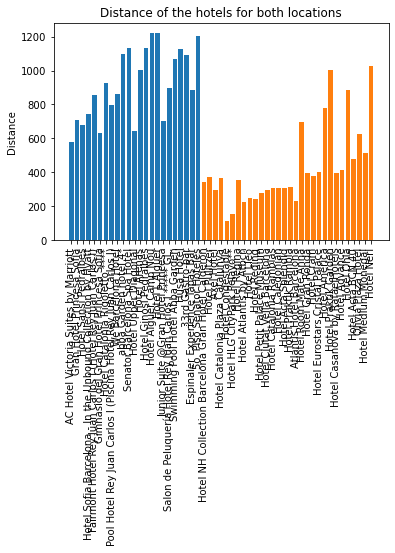

In [17]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib
distances_1 = dataframe_filtered1.distance
distances_2 = dataframe_filtered2.distance
x1=dataframe_filtered1.name
x2=dataframe_filtered2.name

plt.xticks(rotation='vertical')
matplotlib.pyplot.bar(x1,distances_1)

plt.xticks(rotation='vertical')
matplotlib.pyplot.bar(x2,distances_2)

plt.title('Distance of the hotels for both locations')
plt.ylabel('Distance')

In [18]:
rating1=[]
id1 =dataframe_filtered1.id
for i in range (len(id1)):
    url1 = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(id1[i], CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)
    result = requests.get(url1).json()
    result['response']['venue']
    try:
        print(result['response']['venue']['rating'])
        rating1.append(result['response']['venue']['rating'])
    except:
        print('This hotel has not been rated yet.')
 

6.4
6.4
6.0
This hotel has not been rated yet.
6.1
This hotel has not been rated yet.
5.9
This hotel has not been rated yet.
This hotel has not been rated yet.
5.9
5.4
This hotel has not been rated yet.
5.2
This hotel has not been rated yet.
This hotel has not been rated yet.
This hotel has not been rated yet.
This hotel has not been rated yet.
This hotel has not been rated yet.
This hotel has not been rated yet.
This hotel has not been rated yet.
This hotel has not been rated yet.
This hotel has not been rated yet.
This hotel has not been rated yet.


In [19]:
rating2=[]
id2 =dataframe_filtered2.id
for i in range (len(id2)):
    url2 = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(id2[i], CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)
    result = requests.get(url2).json()
    result['response']['venue']
    try:
        print(result['response']['venue']['rating'])
        rating2.append(result['response']['venue']['rating'])
    except:
        print('This hotel has not been rated yet.')
 

7.4
8.4
6.8
7.3
This hotel has not been rated yet.
5.8
6.8
This hotel has not been rated yet.
6.4
This hotel has not been rated yet.
6.6
6.9
6.4
5.9
6.3
7.5
6.3
8.5
5.4
7.9
5.2
7.0
7.7
This hotel has not been rated yet.
This hotel has not been rated yet.
7.5
6.9


KeyError: 'venue'

In [20]:
print(rating1)

[6.4, 6.4, 6.0, 6.1, 5.9, 5.9, 5.4, 5.2]


In [21]:
print(rating2)

[7.4, 8.4, 6.8, 7.3, 5.8, 6.8, 6.4, 6.6, 6.9, 6.4, 5.9, 6.3, 7.5, 6.3, 8.5, 5.4, 7.9, 5.2, 7.0, 7.7, 7.5, 6.9]


In [24]:
mean_r1= np.mean(rating1)
mean_r2= np.mean(rating2)
print('Mean of the rating of the hotels of the Polytechnic University of Catalonia is:', mean_r1)
print('Mean of the rating of the hotels of the University of Barcelona is:', mean_r2)

Mean of the rating of the hotels of the Polytechnic University of Catalonia is: 5.9125
Mean of the rating of the hotels of the University of Barcelona is: 6.859090909090909
